In [1275]:
import pandas as pd

In [1276]:
df = pd.read_excel("/Users/jennifercyc/Desktop/HSH/ML Project/fraud-detector/data/Worksheet in Case Study question 2.xlsx")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [1277]:
#df.info()

#91 NaNs in column "authorities_contacted"

In [1278]:
'''
for i in df.columns.tolist():
    print(f"{i}: {df[i].unique()[:10]}")
'''

'\nfor i in df.columns.tolist():\n    print(f"{i}: {df[i].unique()[:10]}")\n'

In [1279]:
'''
for i in df.columns.tolist():
    print(f"{df[i].value_counts()}")
'''

'\nfor i in df.columns.tolist():\n    print(f"{df[i].value_counts()}")\n'

In [1280]:
'''
for i in df.columns.tolist():
    print(f"{i}: {df[i].describe(include='all')}")
'''

'\nfor i in df.columns.tolist():\n    print(f"{i}: {df[i].describe(include=\'all\')}")\n'

In [1281]:
# identify categorial or free-text columns

unique_counts = df.select_dtypes(include=['object']).nunique()
unique_counts

policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         4
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

## Data Cleaning - "Object" columns

### inspect for empty spaces or inconsistent capitalisation

In [1282]:
'''
for i in df.select_dtypes(include=['object']):
    print(f"{i}: {df[i].unique()[:39]}")
'''

'\nfor i in df.select_dtypes(include=[\'object\']):\n    print(f"{i}: {df[i].unique()[:39]}")\n'

### handling missing values

In [1283]:
df.select_dtypes(include=['object']).isna().sum()

policy_state                0
policy_csl                  0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
incident_type               0
collision_type              0
incident_severity           0
authorities_contacted      91
incident_state              0
incident_city               0
incident_location           0
property_damage             0
police_report_available     0
auto_make                   0
auto_model                  0
fraud_reported              0
dtype: int64

In [1284]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')

In [1285]:
# Replace "?" with "Unknown" in categorical columns

df['collision_type'] = df['collision_type'].replace('?', 'Unknown')
df['property_damage'] = df['property_damage'].replace('?', 'Unknown')
df['police_report_available'] = df['police_report_available'].replace('?', 'Unknown')

## Data Cleaning - "Datetime" columns

In [1286]:
# Check for invalid dates (NaT) in datetime columns

invalid_policy_dates = df[df['policy_bind_date'].isna()]
invalid_policy_dates

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [1287]:
# Check for invalid dates (NaT) in datetime columns

invalid_incident_dates = df[df['incident_date'].isna()]
invalid_incident_dates

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


## Data Cleaning - numerical columns

### retype the columns based on their nature

In [1288]:
df['policy_number'] = df['policy_number'].astype(str)
df['insured_zip'] = df['insured_zip'].astype(str)

df['policy_deductable'] = df['policy_deductable'].astype(float)
df['umbrella_limit'] = df['umbrella_limit'].astype(float)
df['capital-gains'] = df['capital-gains'].astype(float)
df['capital-loss'] = df['capital-loss'].astype(float)
df['total_claim_amount'] = df['total_claim_amount'].astype(float)
df['injury_claim'] = df['injury_claim'].astype(float)
df['property_claim'] = df['property_claim'].astype(float)
df['vehicle_claim'] = df['vehicle_claim'].astype(float)

In [1289]:
#df.info()

### handling outliers and invalid values

In [1290]:
# negative values

for col in ['months_as_customer', 'policy_deductable', 'umbrella_limit', 'age', 'capital-gains', 'capital-loss', 
            'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
           'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']:
    if (df[col] < 0).sum() != 0:
        print(col)

umbrella_limit
capital-loss


In [1291]:
for i in df[df['umbrella_limit'] < 0].index:
    df.loc[i, 'umbrella_limit'] *= -1

df[df['umbrella_limit'] < 0]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [1292]:
# make sense that capital-loss is zero or negative value
# check for positive values instead
df[df['capital-loss'] > 0]['capital-loss']        

Series([], Name: capital-loss, dtype: float64)

In [1293]:
# calculate months_with_policy based on the dates
df['months_with_policy'] = ((df['incident_date'] - df['policy_bind_date']) / pd.Timedelta(days=30)).astype(int)

In [1294]:
#df[['months_as_customer','policy_bind_date', 'incident_date', 'months_with_policy']].sort_values("policy_bind_date")
#df[df['months_with_policy'] > df['months_as_customer']][['months_as_customer','policy_bind_date', 'incident_date', 'months_with_policy']].sort_values("months_as_customer")

# Generally, months_as_customer should ≥ months_with_policy (calculated) -> fix the invalid values
df.loc[df['months_with_policy'] > df['months_as_customer'], 'months_as_customer'] = df['months_with_policy']
df[['months_as_customer','policy_bind_date', 'incident_date', 'months_with_policy']].sort_values("policy_bind_date")

,months_as_customer,policy_bind_date,incident_date,months_with_policy
46,305,1990-01-08,2015-02-18,305
278,304,1990-01-27,2015-01-20,304
601,304,1990-02-01,2015-01-24,304
7,305,1990-02-03,2015-02-27,305
28,303,1990-02-08,2015-01-08,303
...,...,...,...,...
355,256,2014-12-13,2015-02-06,1
18,160,2014-12-28,2015-01-19,0
918,180,2015-01-03,2015-02-19,1
775,89,2015-01-17,2015-01-23,0


In [1295]:
#df[df['policy_bind_date'] >= df['incident_date']][['months_as_customer','policy_bind_date', 'incident_date', 'months_with_policy', 'fraud_reported']]

# logically, incident_date should not be earlier than policy_bind_date
df = df[df['policy_bind_date'] < df['incident_date']]

In [1296]:
#df.info()

#999 rows left

In [1297]:
df[['months_as_customer', 'policy_deductable', 'umbrella_limit', 'age', 'capital-gains', 'capital-loss', 
            'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
           'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']].describe()

,months_as_customer,policy_deductable,umbrella_limit,age,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,240.765766,1136.136136,1.104104e+06,38.934935,25100.800801,-26820.520521,1.838839,0.991992,1.485485,52763.613614,7432.992993,7399.109109,37931.511512
std,93.983088,612.155989,2.297331e+06,9.135518,27874.658249,28105.366259,1.019378,0.820538,1.110859,26414.704027,4883.377920,4827.120746,18895.538780
min,6.000000,500.000000,0.000000e+00,19.000000,0.000000,-111100.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000
25%,174.000000,500.000000,0.000000e+00,32.000000,0.000000,-51500.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000
50%,245.000000,1000.000000,0.000000e+00,38.000000,0.000000,-24100.000000,1.000000,1.000000,1.000000,58140.000000,6770.000000,6750.000000,42120.000000
75%,290.000000,2000.000000,0.000000e+00,44.000000,51050.000000,0.000000,3.000000,2.000000,2.000000,70595.000000,11310.000000,10890.000000,50845.000000
max,479.000000,2000.000000,1.000000e+07,64.000000,100500.000000,0.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000


In [1298]:
# Outlier Detection (Numerical Columns) -- IQR method

df_clean = df.copy()

iqr_columns = [
    'months_as_customer', 'umbrella_limit', 'age',
    'capital-gains', 'capital-loss', 'bodily_injuries',
    'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'
]

for col in iqr_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

#df_clean.info()

#781 rows left

In [1299]:
df_outliers = df[~df.index.isin(df_clean.index)]  # the 218 dropped rows, possibly extreme/risky data
df_inliers = df_clean                             # main cleaned dataset

In [1300]:
# Get counts
inlier_counts = df_inliers["fraud_reported"].value_counts()
outlier_counts = df_outliers["fraud_reported"].value_counts()

# Create a summary DataFrame
summary = pd.DataFrame({
    "Inliers Count": inlier_counts,
    "Outliers Count": outlier_counts
})

# Add class ratio (percentage)
summary["Inliers %"] = (summary["Inliers Count"] / summary["Inliers Count"].sum() * 100).round(2)
summary["Outliers %"] = (summary["Outliers Count"] / summary["Outliers Count"].sum() * 100).round(2)

summary.index = summary.index.map({'N': "Not Fraud", 'Y': "Fraud"})

summary

,Inliers Count,Outliers Count,Inliers %,Outliers %
fraud_reported,,,,
Not Fraud,598,154,76.57,70.64
Fraud,183,64,23.43,29.36


Even though outliers have a slightly higher fraud rate (29%), both sets stay reasonably aligned.  
Models trained separately won’t face imbalance issues (not introducing sampling bias by separating them)  
So I can separately fit model to both sets.

## Next Step: Data Transformation, Model Building, Training and Evaluation

build two types of models on both **df_inliers** and **df_outliers**:  
- for LogisticRegression model, using **one-hot encoding** for features with medium cardinality  
- for XGBoost model, using **label encoding** for features with medium cardinality  

### Model 1: df_inliers, Logistic Regression with One-Hot Encoding

In [1301]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [1302]:
# prepare data
df_inliers_lr = df_inliers.copy()
df_inliers_lr['fraud_reported'] = df_inliers_lr['fraud_reported'].map({'Y': 1, 'N': 0})

X = df_inliers_lr.drop('fraud_reported', axis=1)
y = df_inliers_lr['fraud_reported']

In [1303]:
# separate numerical and categorial columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Drop irrelevant categorical features
for col in ['policy_number', 'insured_zip']:
    if col in categorical_cols:
        categorical_cols.remove(col)

In [1304]:
# Preprocessing & Pipeline

X[categorical_cols] = X[categorical_cols].astype(str)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [1305]:
# Train/Test Split & Fit

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_amount',
                                                   'injury_claim',
                                                   'property_claim',
                                                   '...
                                                   'insured_sex',
                                                   'insured_education_level',
                                                   'insured_occupation',
                                                   'insured_hobbies',
                                                   'insured_relationship',
                                                   'incident_type',
                                                   'collision_type',
                                                   'incident_severity',
                                                   'authorities_contacted',
                                                   'incident_state',
                                                   'incident_city',
                                                   'incident_location',
                                                   'property_damage',
                                                   'police_report_available',
                                                   'auto_make',
                                                   'auto_model'])])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [1306]:
# Evaluation

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
report1 = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       120
           1       0.69      0.49      0.57        37

    accuracy                           0.83       157
   macro avg       0.77      0.71      0.73       157
weighted avg       0.82      0.83      0.82       157



#### Model 1 (specific for inliers):  
- **Accuracy**: 83%  
- **F1-score** (Fraud class 1): 0.57  
- **Recall** for fraud: 0.49 — room to boost fraud capture rate  

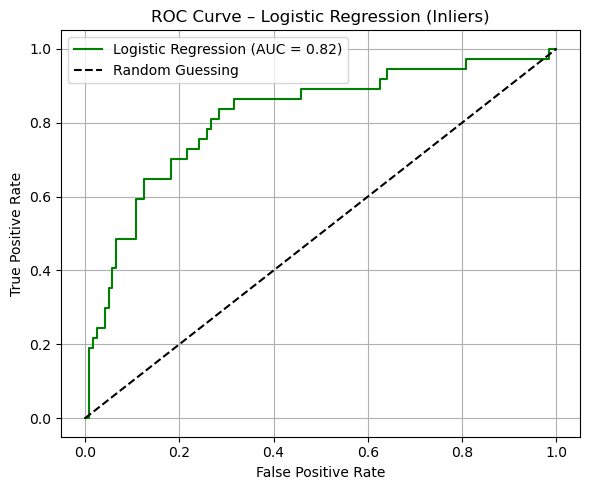

In [1307]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities (class 1 = fraud)
y_proba_lr = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression (Inliers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model 2: df_inliers, XGBoost with Label Encoding

In [1308]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [1309]:
df_inliers_xgb = df_inliers.copy()
df_inliers_xgb['fraud_reported'] = df_inliers_xgb['fraud_reported'].map({'Y': 1, 'N': 0})

X = df_inliers_xgb.drop(['fraud_reported','policy_number', 'insured_zip'], axis=1)
y = df_inliers_xgb['fraud_reported']

X['bind_year'] = pd.to_datetime(X['policy_bind_date']).dt.year
X['incident_month'] = pd.to_datetime(X['incident_date']).dt.month
X = X.drop(['policy_bind_date', 'incident_date'], axis=1)

In [1310]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

In [1311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [1312]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [1313]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
report2 = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       120
           1       0.62      0.57      0.59        37

    accuracy                           0.82       157
   macro avg       0.74      0.73      0.74       157
weighted avg       0.81      0.82      0.81       157



#### Model 2 (specific for inliers):  
- XGBoost is catching more fraud cases (**recall** improved)  
- Overall **F1-score** is higher → great sign of balanced performance.  

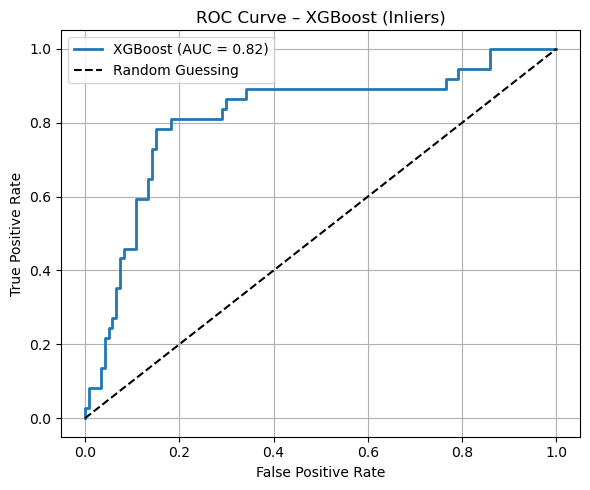

In [1314]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (not just class labels)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # probability for class 1 (fraud)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost (Inliers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model 3: df_outliers, Logistic Regression with One-Hot Encoding

In [1315]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [1316]:
# prepare data
df_outliers_lr = df_outliers.copy()
df_outliers_lr['fraud_reported'] = df_outliers_lr['fraud_reported'].map({'Y': 1, 'N': 0})

X = df_outliers_lr.drop('fraud_reported', axis=1)
y = df_outliers_lr['fraud_reported']

In [1317]:
# separate numerical and categorial columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Drop irrelevant categorical features
for col in ['policy_number', 'insured_zip']:
    if col in categorical_cols:
        categorical_cols.remove(col)

In [1318]:
# Preprocessing & Pipeline

X[categorical_cols] = X[categorical_cols].astype(str)

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [1319]:
# Train/Test Split & Fit

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses',
                                                   'total_claim_amount',
                                                   'injury_claim',
                                                   'property_claim',
                                                   '...
                                                   'insured_sex',
                                                   'insured_education_level',
                                                   'insured_occupation',
                                                   'insured_hobbies',
                                                   'insured_relationship',
                                                   'incident_type',
                                                   'collision_type',
                                                   'incident_severity',
                                                   'authorities_contacted',
                                                   'incident_state',
                                                   'incident_city',
                                                   'incident_location',
                                                   'property_damage',
                                                   'police_report_available',
                                                   'auto_make',
                                                   'auto_model'])])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [1320]:
# Evaluation

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
report3 = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.67      0.77      0.71        13

    accuracy                           0.82        44
   macro avg       0.78      0.80      0.79        44
weighted avg       0.83      0.82      0.82        44



#### Model 3  (specific for outliers):  
- Outliers likely exaggerate fraudulent patterns (extreme claim sizes, rare categories, etc.)  
- **F1-score** for fraud (0.71) is better than your inlier LR model (0.57)  
- **Recall** for fraud = 0.77, which means this model catches most of the frauds  
- Overall **accuracy** and balance are very strong (despite a small dataset)  

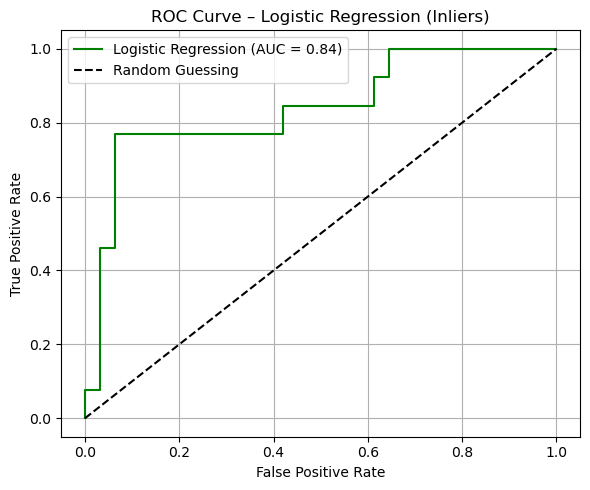

In [1321]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities (class 1 = fraud)
y_proba_lr = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression (Inliers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Model 4: df_outliers, XGBoost with Label Encoding

In [1322]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [1323]:
df_outliers_xgb = df_outliers.copy()
df_outliers_xgb['fraud_reported'] = df_outliers_xgb['fraud_reported'].map({'Y': 1, 'N': 0})

X = df_outliers_xgb.drop(['fraud_reported','policy_number', 'insured_zip'], axis=1)
y = df_outliers_xgb['fraud_reported']

X['bind_year'] = pd.to_datetime(X['policy_bind_date']).dt.year
X['incident_month'] = pd.to_datetime(X['incident_date']).dt.month
X = X.drop(['policy_bind_date', 'incident_date'], axis=1)

In [1324]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

In [1325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [1326]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [1327]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
report4 = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.83      0.77      0.80        13

    accuracy                           0.89        44
   macro avg       0.87      0.85      0.86        44
weighted avg       0.88      0.89      0.88        44



#### Model 4 (specific for outliers):  
- Overall **F1-score** is higher than model 2 with logistic regression
- Even higher **accuracy** than model 2

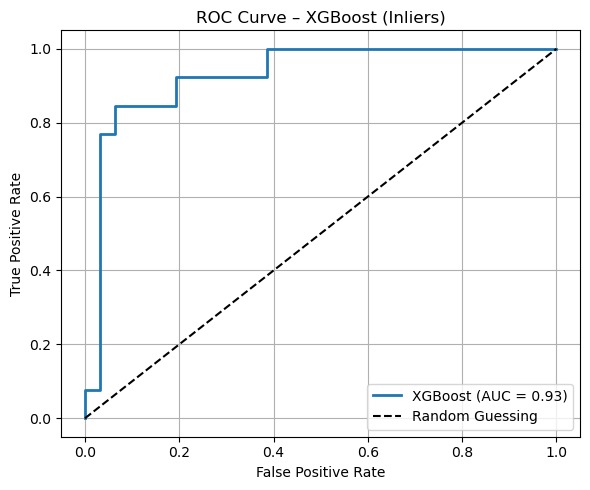

In [1328]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities (not just class labels)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # probability for class 1 (fraud)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost (Inliers)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare all 4 models for inliers and outliers

In [1329]:
model_names = [
    "Model 1: LR Inliers",
    "Model 2: XGB Inliers",
    "Model 3: LR Outliers",
    "Model 4: XGB Outliers"
]

# Extract F1 and Recall for class '1' (fraud)
metrics = {
    "F1 (Fraud)": [report['1']['f1-score'] for report in [report1, report2, report3, report4]],
    "Recall (Fraud)": [report['1']['recall'] for report in [report1, report2, report3, report4]],
    "Precision (Fraud)": [report['1']['precision'] for report in [report1, report2, report3, report4]],
    "Accuracy": [report['accuracy'] for report in [report1, report2, report3, report4]]
}

# Build DataFrame
summary_df = pd.DataFrame(metrics, index=model_names)
summary_df = summary_df.round(2)

summary_df

,F1 (Fraud),Recall (Fraud),Precision (Fraud),Accuracy
Model 1: LR Inliers,0.57,0.49,0.69,0.83
Model 2: XGB Inliers,0.59,0.57,0.62,0.82
Model 3: LR Outliers,0.71,0.77,0.67,0.82
Model 4: XGB Outliers,0.80,0.77,0.83,0.89


for inliers data:  
- model 2 is better because of high recall and overall f1-score  
- model 2 captures more actual fraud cases
- Precision is a bit lower, but acceptable trade-off

for outliers data:  
- model 4 is better obviously
- all metrics performance better (except recall is same as in model 3)  